## Task Brief

TrueLayer - Data Analyst - Take-home test.

At TrueLayer, converting payments to be successful is one of our biggest priorities and drivers of revenue. Payments can go through many stages between being initiated, to failing or succeeding (Executed) and many in-between.

Using the example data set provided and analysis tool of your choice, create a presentation that provides insight on 2-3 KPIs you think would be relevant. Assume your target audience are non-technical business stakeholders and include details for metric selection, data preparation, reasoning and suggestions.

Deliverables
- Documentation: Provide your insight as a presentation or document

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("white")
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

## Load Data

In [3]:
df = pd.read_csv('data/truelayer_analytics_test_data_set.csv')#, parse_dates=['createdat_ts'], index_col='createdat_ts')
df.head()

,id,bank_id,currency,status,api_version,failure_reason,failure_stage,customer_id,vertical,connectivity_type,amount_in_currency,country_id,createdat_ts,lastupdatedat_ts,initiated_at,executed_at,failed_at,authorizing_at,authorized_at,settled_at,created_at_date,created_at_year,created_at_month_start,created_at_month_name,created_at_year_week,created_at_year_month,created_at_month_labels,created_at_year_labels,is_failed,amount_EUR,amount_bin,amount_bin_n
0,3c6646ef17a52ac2e35fdb6a15aa44db6d85985b,b5ab8f51d35b64af079485e5bbbc335213f3a0ae,CAD,Executed,v3,not_defined,not_defined,365a3d703f257f52adde00af51c7f4897a6f9c6a,vertical 2,type 8,28.0,9e2b06736b477b7a924f60de14a7e329d82d6f4f,2010-02-10 06:00:06.452249,2010-02-10 06:00:14.766862,2010-02-10 06:00:06.452249,2010-02-10 06:00:14.766862,NaN,2010-02-10 06:00:06.452249,2010-02-10 06:00:06.452249,NaN,2010-02-10,2010,2010-02-01,Feb,2010-06,2010-Feb,NaN,NaN,0,19.310345,<q95,<90
1,6c3e58befae5a4880c62c54bdffe7243ab7b66cc,34a0061ba48d1c2810cd930dd69d42482ca92d85,CAD,Executed,v3,not_defined,not_defined,365a3d703f257f52adde00af51c7f4897a6f9c6a,vertical 2,type 8,18.0,9e2b06736b477b7a924f60de14a7e329d82d6f4f,2010-01-12 06:00:17.890703,2010-01-12 06:00:22.517782,2010-01-12 06:00:17.890703,2010-01-12 06:00:22.517782,NaN,2010-01-12 06:00:17.890703,2010-01-12 06:00:17.890703,NaN,2010-01-12,2010,2010-01-01,Jan,2010-02,2010-Jan,NaN,2010.0,0,12.413793,<q95,<90
2,b2ee452081f287aa12f0efbd05c278edd332def9,660054a4565377c6e43ff7709abf56d8494ba604,CAD,Executed,v3,not_defined,not_defined,365a3d703f257f52adde00af51c7f4897a6f9c6a,vertical 2,type 8,28.5,9e2b06736b477b7a924f60de14a7e329d82d6f4f,2010-02-10 07:20:57.816799,2010-02-10 07:21:04.284348,2010-02-10 07:20:57.816799,2010-02-10 07:21:04.284348,NaN,2010-02-10 07:20:57.816799,2010-02-10 07:20:57.816799,NaN,2010-02-10,2010,2010-02-01,Feb,2010-06,2010-Feb,NaN,NaN,0,19.655172,<q95,<90
3,5aa68c655e0ca1e57bcf4a70c269151811e3ee77,660054a4565377c6e43ff7709abf56d8494ba604,CAD,Executed,v3,not_defined,not_defined,365a3d703f257f52adde00af51c7f4897a6f9c6a,vertical 2,type 8,16.0,9e2b06736b477b7a924f60de14a7e329d82d6f4f,2010-02-10 06:00:20.172570,2010-02-10 06:00:25.549863,2010-02-10 06:00:20.172570,2010-02-10 06:00:25.549863,NaN,2010-02-10 06:00:20.172570,2010-02-10 06:00:20.172570,NaN,2010-02-10,2010,2010-02-01,Feb,2010-06,2010-Feb,NaN,NaN,0,11.034483,<q95,<90
4,1d72b60adefab1066d7421d72a2c3abb3d558544,0090e57640ed78b0c16ac4606a6773769545bb17,CAD,Executed,v3,not_defined,not_defined,64c370a753b1db282770cdbf2aba5434a3185b3d,vertical 2,type 8,5.0,9e2b06736b477b7a924f60de14a7e329d82d6f4f,2009-08-14 13:42:02.939891,2009-08-14 13:42:54.515245,2009-08-14 13:42:09.978416,2009-08-14 13:42:54.515245,NaN,2009-08-14 13:42:03.699860,2009-08-14 13:42:52.858713,2009-08-14 13:42:54.515245,2009-08-14,2009,2009-08-01,Aug,2009-32,2009-Aug,NaN,NaN,0,3.448276,<q95,<90


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       500000 non-null  object 
 1   bank_id                  500000 non-null  object 
 2   currency                 500000 non-null  object 
 3   status                   500000 non-null  object 
 4   api_version              500000 non-null  object 
 5   failure_reason           500000 non-null  object 
 6   failure_stage            500000 non-null  object 
 7   customer_id              500000 non-null  object 
 8   vertical                 500000 non-null  object 
 9   connectivity_type        500000 non-null  object 
 10  amount_in_currency       500000 non-null  float64
 11  country_id               500000 non-null  object 
 12  createdat_ts             500000 non-null  object 
 13  lastupdatedat_ts         500000 non-null  object 
 14  init

### Preprocess

In [4]:
def convert_to_eur(row):
    """Convert amount of transaction in local currency to EUR. 
    """
    exchange_rates = {
        'CAD': 1.45,
        'USD': 1.06,
        'GBP': 0.87,
        'EUR': 1.00
    }
    rate = exchange_rates.get(row['currency'], None)
    if rate:
        return row['amount_in_currency'] / rate
    else:
        raise ValueError(f"Currency {row['currency']} not supported.")

# convert timestamps to pd.datetime
columns_dt = ['createdat_ts', 'lastupdatedat_ts', 'initiated_at', 'executed_at', 'failed_at', 'authorizing_at', 'authorized_at', 'settled_at']
for c in columns_dt:
    df[c] = pd.to_datetime(df[c])

df['time_execution'] = (df['executed_at'] - df['createdat_ts']).dt.total_seconds() * 1000
df['time_fail'] = (df['failed_at'] - df['createdat_ts']).dt.total_seconds() * 1000
# extract create date components
df['created_at_date'] = df['createdat_ts'].dt.date
df['created_at_year'] = df['createdat_ts'].dt.year
df['created_at_year'] = df['created_at_year'].astype(dtype=pd.CategoricalDtype(categories=df['created_at_year'].sort_values().unique(),ordered=True))
df['created_at_month_start'] = df['createdat_ts'].dt.to_period('M').dt.to_timestamp()
df['created_at_month_name'] = df['createdat_ts'].dt.strftime('%b')
df['created_at_year_week'] = df['createdat_ts'].dt.strftime('%Y-%W')
df['created_at_year_month'] = df['createdat_ts'].dt.strftime('%Y-%b')
df['created_at_year_month'] = df['created_at_year_month'].astype(dtype=pd.CategoricalDtype(categories=df.sort_values(by=['created_at_month_start'], ascending=True)['created_at_year_month'].unique(),ordered=True))
df['created_at_month_labels'] = np.where(df['created_at_date'] == df['created_at_month_start'],df['created_at_year_month'].astype(str),'') # for visualization (x axis)
df['created_at_year_labels'] = np.where(df['created_at_month_name'] == 'Jan',df['created_at_year'],'') # for visualization (x axis)



# create a flag if transaction is failed 
df['is_failed'] = df['status'].apply(lambda x: 1 if x in ['failed', 'Failed', 'Rejected', 'AuthorisationFailed'] else 0)

# convert currencies to EUR
df['amount_EUR'] = df.apply(convert_to_eur, axis=1)

# create bins for amount_EUR
q95, q99 = np.quantile(df["amount_EUR"], [0.95, 0.99])
print('q95, q99: ', q95, q99)
df['amount_bin'] = pd.cut(
        df["amount_EUR"], 
        bins=np.concatenate([[df["amount_EUR"].min()], 
                         [q95, q99], 
                         [df["amount_EUR"].max()]]), 
        labels=['<q95', '(q95, q99]', '>q99'], 
        right=True,
        include_lowest=True,
    )
df['amount_bin_n'] = pd.cut(
        df["amount_EUR"], 
        bins=np.concatenate([[df["amount_EUR"].min()], 
                         [90, 500],
                         [df["amount_EUR"].max()]]), 
        labels=['<90', '(90, 500]', '>500'], 
        right=True,
        include_lowest=True,
    )
df['amount_bin'] = df['amount_bin'].astype(dtype=pd.CategoricalDtype(categories=['<q95', '(q95, q99]', '>q99'], ordered=True))
df['amount_bin_n'] = df['amount_bin_n'].astype(dtype=pd.CategoricalDtype(categories=['<90', '(90, 500]', '>500'], ordered=True))

# fill NA
df['failure_reason'] = df['failure_reason'].fillna('not_defined')
df['failure_stage'] = df['failure_stage'].fillna('not_defined')
df['connectivity_type'] = df['connectivity_type'].fillna('not_defined')
df['vertical'] = df['vertical'].fillna('not_defined')

print(df.info())
df.head()


q95, q99:  88.96551724137932 471.6981132075471
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       500000 non-null  object        
 1   bank_id                  500000 non-null  object        
 2   currency                 500000 non-null  object        
 3   status                   500000 non-null  object        
 4   api_version              500000 non-null  object        
 5   failure_reason           500000 non-null  object        
 6   failure_stage            500000 non-null  object        
 7   customer_id              500000 non-null  object        
 8   vertical                 500000 non-null  object        
 9   connectivity_type        500000 non-null  object        
 10  amount_in_currency       500000 non-null  float64       
 11  country_id               500000

,id,bank_id,currency,status,api_version,failure_reason,failure_stage,customer_id,vertical,connectivity_type,amount_in_currency,country_id,createdat_ts,lastupdatedat_ts,initiated_at,executed_at,failed_at,authorizing_at,authorized_at,settled_at,created_at_date,created_at_year,created_at_month_start,created_at_month_name,created_at_year_week,created_at_year_month,created_at_month_labels,created_at_year_labels,is_failed,amount_EUR,amount_bin,amount_bin_n,time_execution,time_fail
0,3c6646ef17a52ac2e35fdb6a15aa44db6d85985b,b5ab8f51d35b64af079485e5bbbc335213f3a0ae,CAD,Executed,v3,not_defined,not_defined,365a3d703f257f52adde00af51c7f4897a6f9c6a,vertical 2,type 8,28.0,9e2b06736b477b7a924f60de14a7e329d82d6f4f,2010-02-10 06:00:06.452249,2010-02-10 06:00:14.766862,2010-02-10 06:00:06.452249,2010-02-10 06:00:14.766862,NaT,2010-02-10 06:00:06.452249,2010-02-10 06:00:06.452249,NaT,2010-02-10,2010,2010-02-01,Feb,2010-06,2010-Feb,,,0,19.310345,<q95,<90,8314.613,NaN
1,6c3e58befae5a4880c62c54bdffe7243ab7b66cc,34a0061ba48d1c2810cd930dd69d42482ca92d85,CAD,Executed,v3,not_defined,not_defined,365a3d703f257f52adde00af51c7f4897a6f9c6a,vertical 2,type 8,18.0,9e2b06736b477b7a924f60de14a7e329d82d6f4f,2010-01-12 06:00:17.890703,2010-01-12 06:00:22.517782,2010-01-12 06:00:17.890703,2010-01-12 06:00:22.517782,NaT,2010-01-12 06:00:17.890703,2010-01-12 06:00:17.890703,NaT,2010-01-12,2010,2010-01-01,Jan,2010-02,2010-Jan,,2010,0,12.413793,<q95,<90,4627.079,NaN
2,b2ee452081f287aa12f0efbd05c278edd332def9,660054a4565377c6e43ff7709abf56d8494ba604,CAD,Executed,v3,not_defined,not_defined,365a3d703f257f52adde00af51c7f4897a6f9c6a,vertical 2,type 8,28.5,9e2b06736b477b7a924f60de14a7e329d82d6f4f,2010-02-10 07:20:57.816799,2010-02-10 07:21:04.284348,2010-02-10 07:20:57.816799,2010-02-10 07:21:04.284348,NaT,2010-02-10 07:20:57.816799,2010-02-10 07:20:57.816799,NaT,2010-02-10,2010,2010-02-01,Feb,2010-06,2010-Feb,,,0,19.655172,<q95,<90,6467.549,NaN
3,5aa68c655e0ca1e57bcf4a70c269151811e3ee77,660054a4565377c6e43ff7709abf56d8494ba604,CAD,Executed,v3,not_defined,not_defined,365a3d703f257f52adde00af51c7f4897a6f9c6a,vertical 2,type 8,16.0,9e2b06736b477b7a924f60de14a7e329d82d6f4f,2010-02-10 06:00:20.172570,2010-02-10 06:00:25.549863,2010-02-10 06:00:20.172570,2010-02-10 06:00:25.549863,NaT,2010-02-10 06:00:20.172570,2010-02-10 06:00:20.172570,NaT,2010-02-10,2010,2010-02-01,Feb,2010-06,2010-Feb,,,0,11.034483,<q95,<90,5377.293,NaN
4,1d72b60adefab1066d7421d72a2c3abb3d558544,0090e57640ed78b0c16ac4606a6773769545bb17,CAD,Executed,v3,not_defined,not_defined,64c370a753b1db282770cdbf2aba5434a3185b3d,vertical 2,type 8,5.0,9e2b06736b477b7a924f60de14a7e329d82d6f4f,2009-08-14 13:42:02.939891,2009-08-14 13:42:54.515245,2009-08-14 13:42:09.978416,2009-08-14 13:42:54.515245,NaT,2009-08-14 13:42:03.699860,2009-08-14 13:42:52.858713,2009-08-14 13:42:54.515245,2009-08-14,2009,2009-08-01,Aug,2009-32,2009-Aug,,,0,3.448276,<q95,<90,51575.354,NaN


0    1.0
Name: amount_in_currency, dtype: float64
                    count  count_log
amount_in_currency                  
1.0                   136   2.133539
5.0                    84   1.924279
2.0                    82   1.913814
10.0                   66   1.819544
0.5                    61   1.785330
20.0                   33   1.518514


/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_19573/710419165.py:7: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  print(s_df[:20])


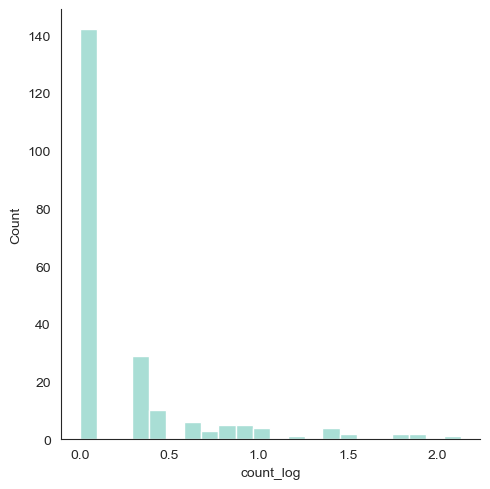

In [5]:
# mode of amount_in_currency
s = df.sample(1000)['amount_in_currency']
print(s.mode())

s_df = s.value_counts().sort_values(ascending=False).to_frame()
s_df['count_log'] = np.log10(s_df['count'])
print(s_df[:20])

sns.displot(x=s_df['count_log'])
plt.show()

### Summaries for columns

In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

col_include = ['amount_bin', 'amount_bin_n', 'api_version', 'connectivity_type',
       'created_at_year', 'created_at_year_labels', 'currency',
       'failure_stage', 'is_failed', 'vertical']
df_summary = pd.DataFrame({
    'Type': df.dtypes,
    'Count': df.count(),
    'Count NA': df.isna().sum(),
    'Count Unique': df.nunique(),
    'Unique Values (Categorical)': [
        ', '.join(map(str, df[col].unique())) if df[col].dtype == 'object' and col not in ['id', 'bank_id', 'customer_id', 'country_id'] and col in col_include else None 
        for col in df.columns
    ]
}, index=df.columns).sort_index()
#df_summary[df_summary['Unique Count']<10].index
df_summary

,Type,Count,Count NA,Count Unique,Unique Values (Categorical)
amount_EUR,float64,500000,0,13539,None
amount_bin,category,500000,0,3,None
amount_bin_n,category,500000,0,3,None
amount_in_currency,float64,500000,0,11178,None
api_version,object,500000,0,3,"v3, v2, v1"
authorized_at,datetime64[ns],198205,301795,198205,None
authorizing_at,datetime64[ns],239327,260673,239327,None
bank_id,object,500000,0,203,None
connectivity_type,object,500000,0,7,"type 8, type 6, not_defined, type 1, type 3, type 2, type 7"
country_id,object,500000,0,14,None


## Analysis: Feature Importance

### Scale and Encode features 

In [10]:
# prepare dataset for Logistic Regression and Random Forest: encode categorical features, scale numeric

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_to_drop = ['id', 'customer_id', 'created_at_month_start', 'bank_id', 'created_at_date','created_at_year_week', 'created_at_year_month', 'created_at_year_labels', 'created_at_month_labels', 'created_at_month_start']
df_ = df.drop(columns=columns_dt + columns_to_drop)

columns_num = df_.drop(columns='is_failed').select_dtypes(include=['number']).columns
columns_cat = df_.select_dtypes(include=['object', 'category']).columns

df_encoded = pd.get_dummies(df_, columns=columns_cat, dtype=int)
df_encoded_scaled = df_encoded.copy()
df_encoded_scaled[columns_num] = scaler.fit_transform(df_encoded_scaled[columns_num])
print(df_encoded.columns)
df_encoded_scaled.head()

Index(['amount_in_currency', 'is_failed', 'amount_EUR', 'currency_CAD',
       'currency_EUR', 'currency_GBP', 'currency_USD',
       'status_AuthorisationFailed', 'status_Cancelled', 'status_Executed',
       ...
       'created_at_month_name_Mar', 'created_at_month_name_May',
       'created_at_month_name_Nov', 'created_at_month_name_Oct',
       'created_at_month_name_Sep', 'amount_bin_<q10', 'amount_bin_(q10,q50]',
       'amount_bin_(q50,q95]', 'amount_bin_(q95,q99]', 'amount_bin_>q99'],
      dtype='object', length=101)


,amount_in_currency,is_failed,amount_EUR,currency_CAD,currency_EUR,currency_GBP,currency_USD,status_AuthorisationFailed,status_Cancelled,status_Executed,status_Executing,status_Failed,status_Initiated,status_New,status_Rejected,status_Submitted,status_authorized,status_authorizing,status_failed,status_initiated,api_version_v1,api_version_v2,api_version_v3,failure_reason_authorization_failed,failure_reason_canceled,failure_reason_constraint_violation,failure_reason_expired,failure_reason_insufficient_funds,failure_reason_internal_server_error,failure_reason_invalid_account_details,failure_reason_invalid_beneficiary_account,failure_reason_invalid_credentials,failure_reason_invalid_otp,failure_reason_invalid_remitter_account,failure_reason_mandate_revoked,failure_reason_not_authorized,failure_reason_not_defined,failure_reason_payment_limit_exceeded,failure_reason_provider_error,failure_reason_provider_expired,failure_reason_provider_rejected,failure_reason_rejected,failure_reason_user_canceled_at_provider,failure_reason_verification_declined,failure_stage_authorization_required,failure_stage_authorized,failure_stage_authorizing,failure_stage_initiated,failure_stage_not_defined,failure_stage_suspended,...,vertical_vertical 1,vertical_vertical 2,vertical_vertical 3,vertical_vertical 4,vertical_vertical 5,connectivity_type_not_defined,connectivity_type_type 1,connectivity_type_type 2,connectivity_type_type 3,connectivity_type_type 6,connectivity_type_type 7,connectivity_type_type 8,country_id_11a86f49df0e17ddda56f76629d36557cb870e6f,country_id_1ef393c389ad6e2b2d4d865f843dcf351b1d19f5,country_id_229fcb7e40c6421b7091c1e9fccf6d94da25d396,country_id_2709cc79b96641fdf25b1da4ed76b33b0f0cde57,country_id_37eec10a53dd5fd2f024a17be5961dfceb0c66e6,country_id_6cdea52ce51f6e135c958a0e37b24c58f571b638,country_id_7ec009376b8bf0c03561b3f6ba251ab9d96efd42,country_id_9e2b06736b477b7a924f60de14a7e329d82d6f4f,country_id_a05b131fd348c62de04bce3d93a6cd396b1db85f,country_id_a68db3fc75fd72a12bb2ad1442ff9927bd04139d,country_id_b5ef652e26c43e83e5a96e013823c0984e2377c2,country_id_beb7a78398a040dadb3da1ba0474ba3899285e46,country_id_e663a75ca1d25c297c92ca032b7bd8d1af3b0b5c,country_id_f69ad584c025f9b756ce1e8c70de3a33aef50b32,created_at_year_2004,created_at_year_2005,created_at_year_2006,created_at_year_2007,created_at_year_2008,created_at_year_2009,created_at_year_2010,created_at_month_name_Apr,created_at_month_name_Aug,created_at_month_name_Dec,created_at_month_name_Feb,created_at_month_name_Jan,created_at_month_name_Jul,created_at_month_name_Jun,created_at_month_name_Mar,created_at_month_name_May,created_at_month_name_Nov,created_at_month_name_Oct,created_at_month_name_Sep,amount_bin_<q10,"amount_bin_(q10,q50]","amount_bin_(q50,q95]","amount_bin_(q95,q99]",amount_bin_>q99
0,-0.008037,0,-0.008067,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-0.010710,0,-0.010294,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,-0.007903,0,-0.007956,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-0.011245,0,-0.010739,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,-0.014186,0,-0.013189,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Correlation between features

Disadvantage: no info about influence on target = 1.

In [19]:
print(df_encoded.corr()['is_failed'].sort_values(ascending=False)[:20])
#print(df_encoded_scaled.corr()['is_failed'].sort_values(ascending=False)[:20])

is_failed                                              1.000000
status_failed                                          0.945792
failure_stage_initiated                                0.668136
failure_reason_expired                                 0.666075
failure_stage_authorizing                              0.495461
failure_reason_not_authorized                          0.348370
failure_stage_authorized                               0.336891
failure_reason_provider_rejected                       0.320949
api_version_v3                                         0.279290
status_Rejected                                        0.273309
failure_reason_canceled                                0.226617
failure_reason_user_canceled_at_provider               0.200034
failure_stage_authorization_required                   0.182119
failure_reason_provider_error                          0.154680
failure_reason_insufficient_funds                      0.141744
failure_reason_provider_expired         

### Feature Importance from Logistic Regression

Advantage: we have info about feature influence on both target =0 and =1


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X, y = df_encoded_scaled.drop(columns='is_failed'), df_encoded_scaled['is_failed']
model = LogisticRegression()
model.fit(X, y)
result_df = pd.DataFrame({'column':X.columns, 'coef': model.coef_[0]})
# feature importance for target = 1
print('for target = 1')
print(result_df.sort_values(by='coef', ascending=False).head(20))
print()
# feature importance for target = 0
print('for target = 0')
print(result_df.sort_values(by='coef', ascending=True).head(20))


for target = 1
                                               column      coef
13                                    status_Rejected  9.968266
10                                      status_Failed  7.150333
17                                      status_failed  6.022016
6                          status_AuthorisationFailed  5.429331
46                            failure_stage_initiated  2.838927
25                             failure_reason_expired  2.799180
75  country_id_f69ad584c025f9b756ce1e8c70de3a33aef...  2.026790
19                                     api_version_v1  1.767098
45                          failure_stage_authorizing  1.766888
2                                        currency_CAD  0.872058
44                           failure_stage_authorized  0.814518
55                      connectivity_type_not_defined  0.812645
34                      failure_reason_not_authorized  0.810033
39                   failure_reason_provider_rejected  0.711626
69  country_id_9e2b06736b

### Feature Importance from Random Forest

Disadvantage: no info about influence on target = 1

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X, y)
result_df = pd.DataFrame({'column':X.columns, 'importance': rf.feature_importances_})
result_df.sort_values(by='importance', ascending=False).head(20)

,column,importance
17,status_failed,0.262538
47,failure_stage_not_defined,0.149964
35,failure_reason_not_defined,0.132850
25,failure_reason_expired,0.091461
46,failure_stage_initiated,0.080969
13,status_Rejected,0.064238
8,status_Executed,0.059732
45,failure_stage_authorizing,0.031119
21,api_version_v3,0.025931
44,failure_stage_authorized,0.015260


In [18]:
# import shap

# # Train SHAP explainer
# explainer = shap.TreeExplainer(rf, X)
# shap_values = explainer.shap_values(X)

# # shap_values[1] corresponds to the target class 1
# shap.summary_plot(shap_values[1], X, plot_type="bar")

## Analysis

Percentage of Failed transactions from total:

In [40]:
df['status'].value_counts(normalize=True)

status
Executed               0.755232
failed                 0.089242
Initiated              0.058948
Cancelled              0.037596
New                    0.037582
initiated              0.009152
Rejected               0.008116
Executing              0.001872
Failed                 0.000956
authorized             0.000486
AuthorisationFailed    0.000412
authorizing            0.000284
Submitted              0.000122
Name: proportion, dtype: float64

~ 10% of transactions failed.

Failure reasons:

In [41]:
# reasons of failure
df_failed = df.query('is_failed == 1')
print(df_failed['failure_reason'].value_counts())

failure_reason
expired                        23173
not_authorized                  6561
provider_rejected               5586
not_defined                     4742
canceled                        2797
user_canceled_at_provider       2182
provider_error                  1307
insufficient_funds              1098
provider_expired                1047
verification_declined            260
rejected                         222
internal_server_error            190
constraint_violation              70
payment_limit_exceeded            39
authorization_failed              29
invalid_credentials               19
invalid_remitter_account          16
mandate_revoked                   14
invalid_account_details            6
invalid_beneficiary_account        3
invalid_otp                        2
Name: count, dtype: int64


### Time trend of failed transactions VS total number of transaction

/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_64661/203122082.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg_date = df.groupby(by=['created_at_year_month']).agg(
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_64661/203122082.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg_status = df.groupby(by=['created_at_year_month', 'status']).agg(


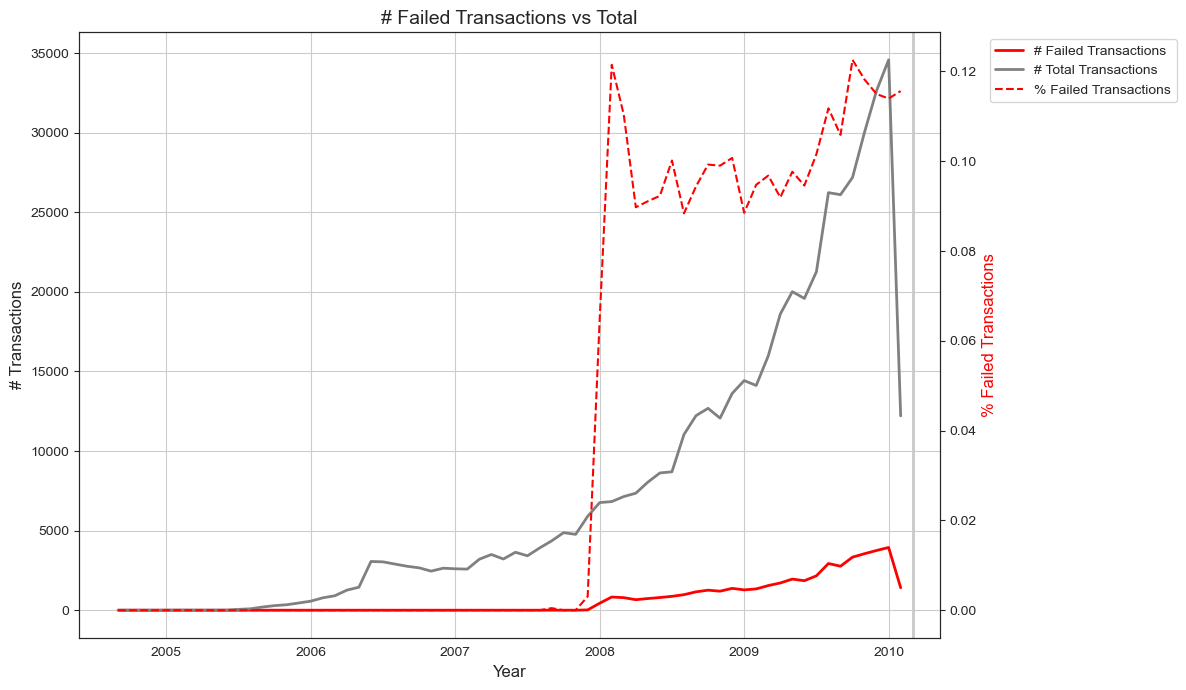

In [50]:
import colorcet as cc

p = sns.color_palette(cc.glasbey, n_colors=30)

df_agg_date = df.groupby(by=['created_at_year_month']).agg(
    n_transactions_total = ('id', 'count'),
    amount_in_currency = ('amount_in_currency', 'sum')
    
).reset_index()

df_agg_status = df.groupby(by=['created_at_year_month', 'status']).agg(
    n_transactions = ('id', 'count')
).reset_index()
#print(df_agg_status.head())


df_agg_status = df_agg_status.merge(df_agg_date, how='inner', left_on=['created_at_year_month'], right_on=['created_at_year_month'])
df_agg_status['pct'] = (df_agg_status['n_transactions'] / df_agg_status['n_transactions_total']) 
df_agg_status['created_at_year_month_labels'] = df_agg_status['created_at_year_month'].apply(lambda x: x[:4] if x.endswith('Jan') else '') # for visualization (x axis)
df_agg_status['created_at_year_month_ticks'] = df_agg_status['created_at_year_month'].apply(lambda x: x if x.endswith('Jan') else '') # for visualization (x axis)


_, ax = plt.subplots(figsize=(12,7))
df_vis = df_agg_status.query('status == "failed"')
sns.lineplot(data=df_vis, x='created_at_year_month', y='n_transactions', color='red', ax=ax, label='# Failed Transactions', lw=2)
sns.lineplot(data=df_vis, x='created_at_year_month', y='n_transactions_total', color='gray', ax=ax, label='# Total Transactions', lw=2)

ax_ = ax.twinx()
sns.lineplot(data=df_vis, x='created_at_year_month', y='pct', color='red', ax=ax_, label='% Failed Transactions', ls='--')

# legend
handles_ax, labels_ax = ax.get_legend_handles_labels()
handles_ax_, labels_ax_ = ax_.get_legend_handles_labels()
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
ax.legend(handles_ax + handles_ax_, labels_ax + labels_ax_, loc='upper left', bbox_to_anchor=(1.05, 1))
ax_.legend_.remove()

ax.set_title('# Failed Transactions vs Total',fontsize=14)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('# Transactions', fontsize=12)
ax_.set_ylabel('% Failed Transactions', color='red', fontsize=12)
#ax_.set_ylim(0,1)
ax.grid()

ax.set_xticks(ticks=df_vis['created_at_year_month_ticks'], labels=df_vis['created_at_year_month_labels'], fontsize=10, fontweight='normal')
#ax.tick_params(axis='both', labelsize=10, labelweight='normal')  # Normal font weight

plt.tight_layout()
#df_agg_status.head(30)

### Time trend of failed transaction by failure reason

/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_64661/4082578110.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg = df.groupby(by=['created_at_year_month', agg_var]).agg(
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_64661/4082578110.py:18: UserWarning: The palette list has more values (30) than needed (21), which may not be intended.
  sns.lineplot(x='created_at_year_month', y='n_transactions', data=df_agg, hue=agg_var, ax=ax, palette=p)


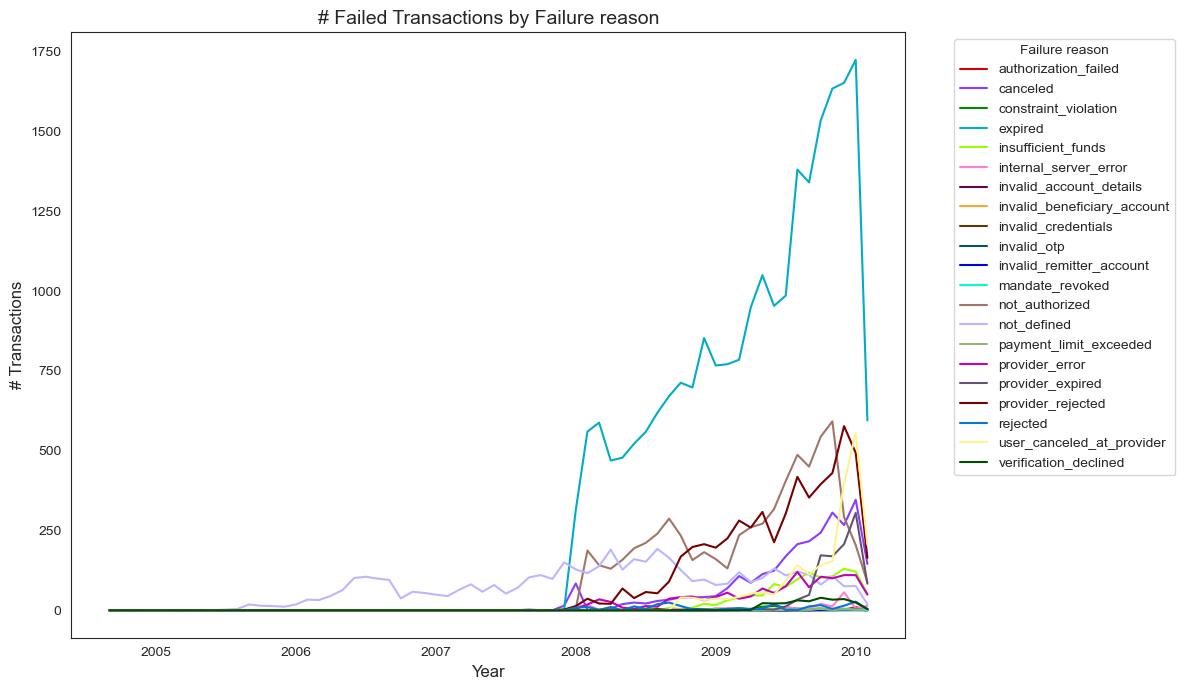

/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_64661/4082578110.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg = df.groupby(by=['created_at_year_month', agg_var]).agg(
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_64661/4082578110.py:18: UserWarning: The palette list has more values (30) than needed (4), which may not be intended.
  sns.lineplot(x='created_at_year_month', y='n_transactions', data=df_agg, hue=agg_var, ax=ax, palette=p)


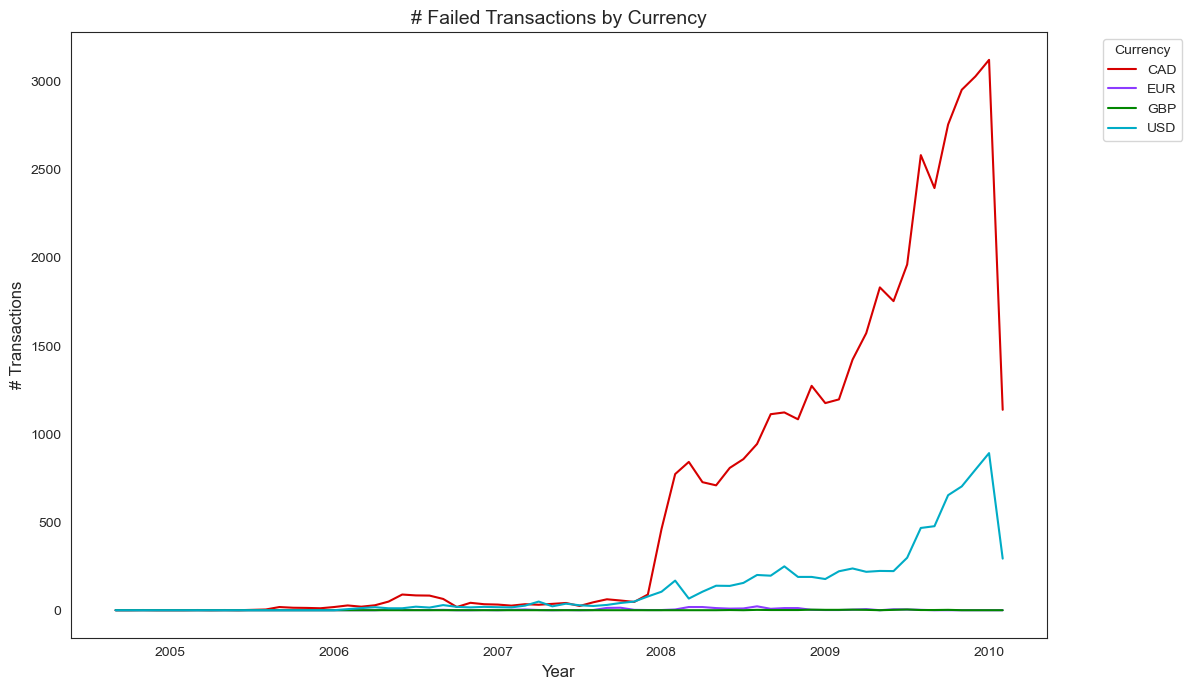

/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_64661/4082578110.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg = df.groupby(by=['created_at_year_month', agg_var]).agg(
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_64661/4082578110.py:18: UserWarning: The palette list has more values (30) than needed (7), which may not be intended.
  sns.lineplot(x='created_at_year_month', y='n_transactions', data=df_agg, hue=agg_var, ax=ax, palette=p)


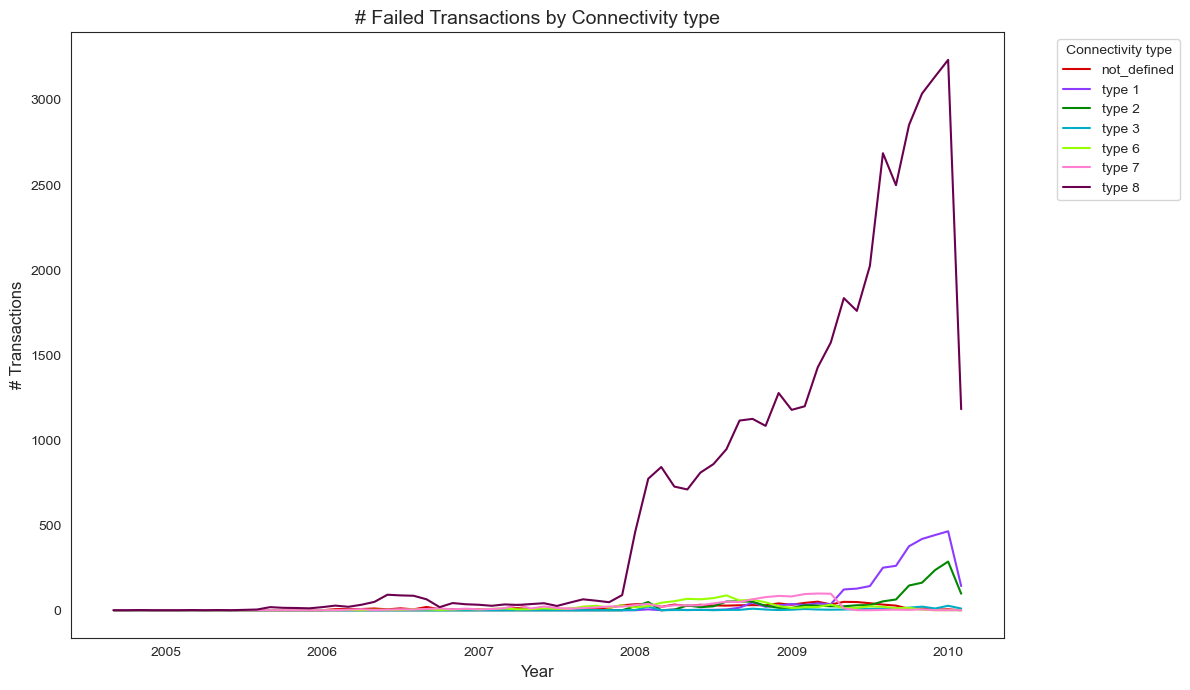

/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_64661/4082578110.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg = df.groupby(by=['created_at_year_month', agg_var]).agg(
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_64661/4082578110.py:18: UserWarning: The palette list has more values (30) than needed (14), which may not be intended.
  sns.lineplot(x='created_at_year_month', y='n_transactions', data=df_agg, hue=agg_var, ax=ax, palette=p)


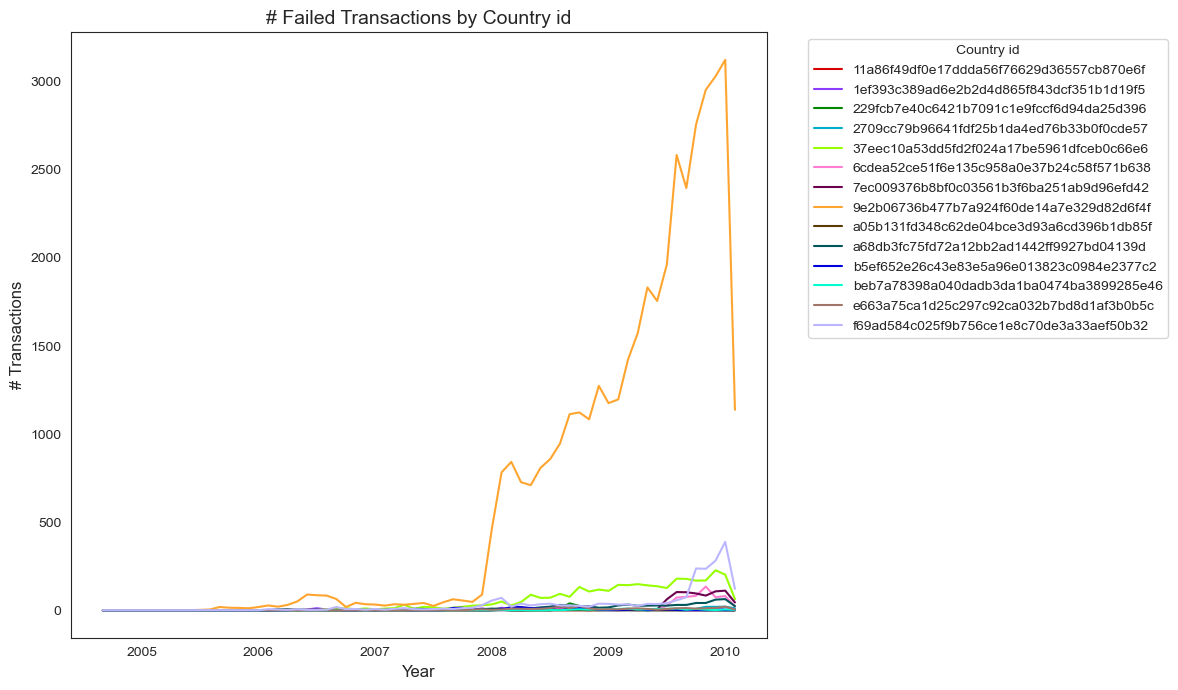

/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_64661/4082578110.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg = df.groupby(by=['created_at_year_month', agg_var]).agg(
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_64661/4082578110.py:18: UserWarning: The palette list has more values (30) than needed (3), which may not be intended.
  sns.lineplot(x='created_at_year_month', y='n_transactions', data=df_agg, hue=agg_var, ax=ax, palette=p)


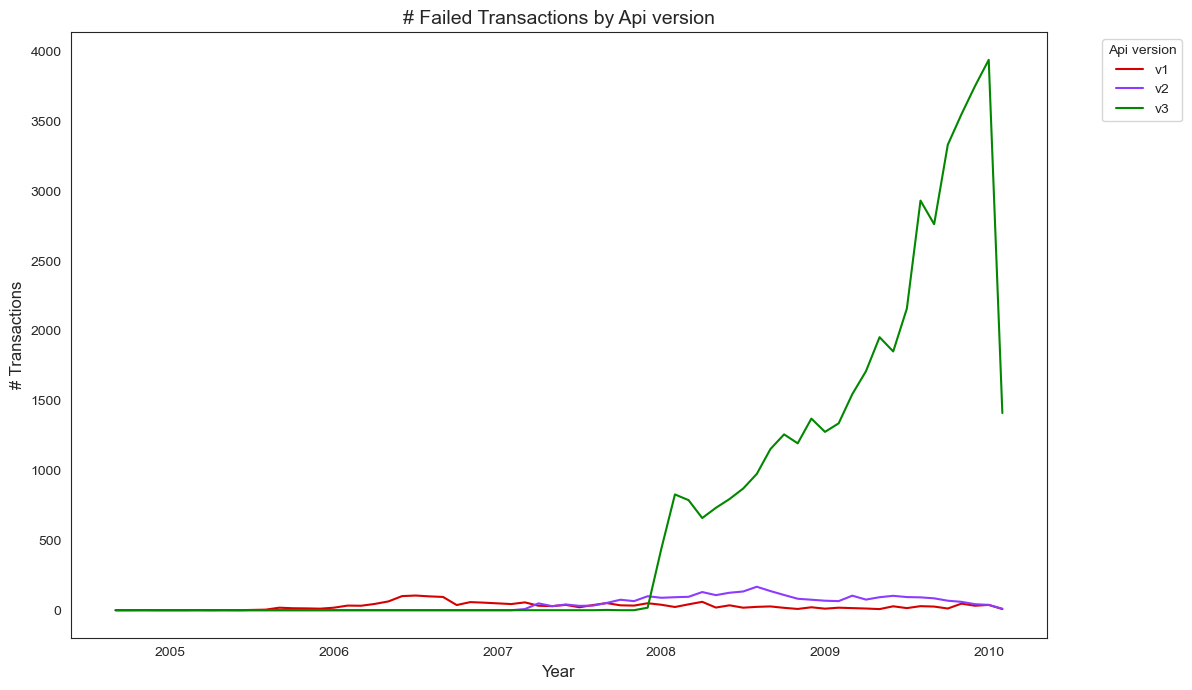

/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_64661/4082578110.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg = df.groupby(by=['created_at_year_month', agg_var]).agg(
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_64661/4082578110.py:18: UserWarning: The palette list has more values (30) than needed (6), which may not be intended.
  sns.lineplot(x='created_at_year_month', y='n_transactions', data=df_agg, hue=agg_var, ax=ax, palette=p)


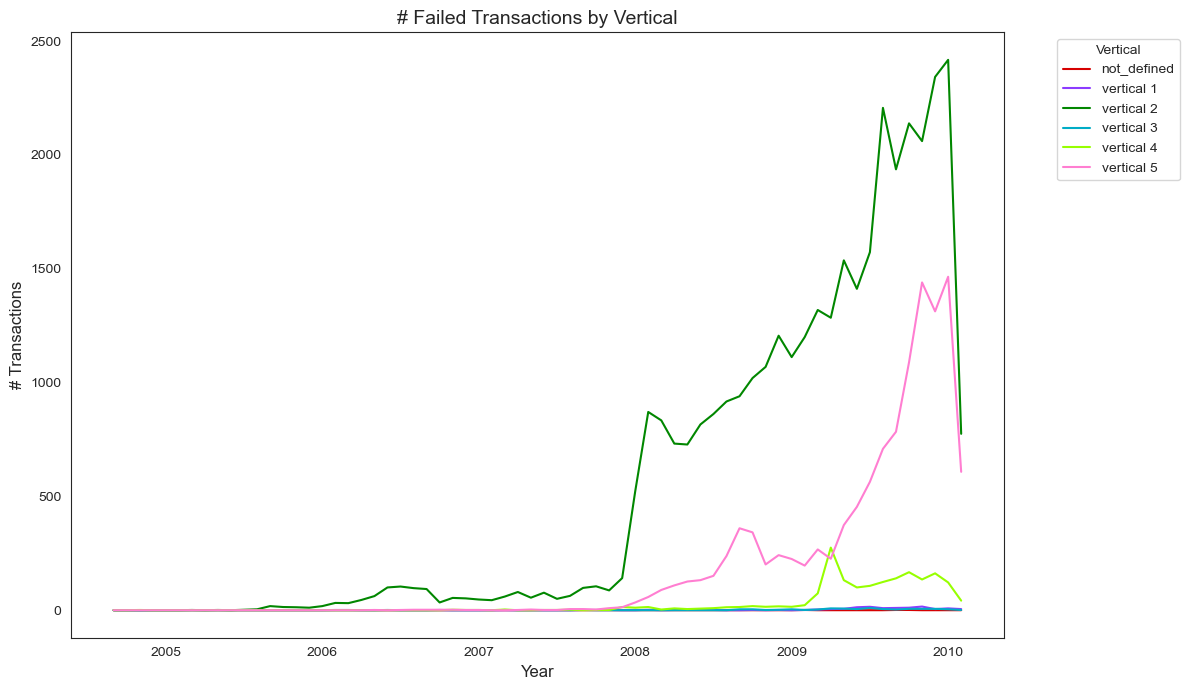

/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_64661/4082578110.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg = df.groupby(by=['created_at_year_month', agg_var]).agg(
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_64661/4082578110.py:18: UserWarning: The palette list has more values (30) than needed (6), which may not be intended.
  sns.lineplot(x='created_at_year_month', y='n_transactions', data=df_agg, hue=agg_var, ax=ax, palette=p)


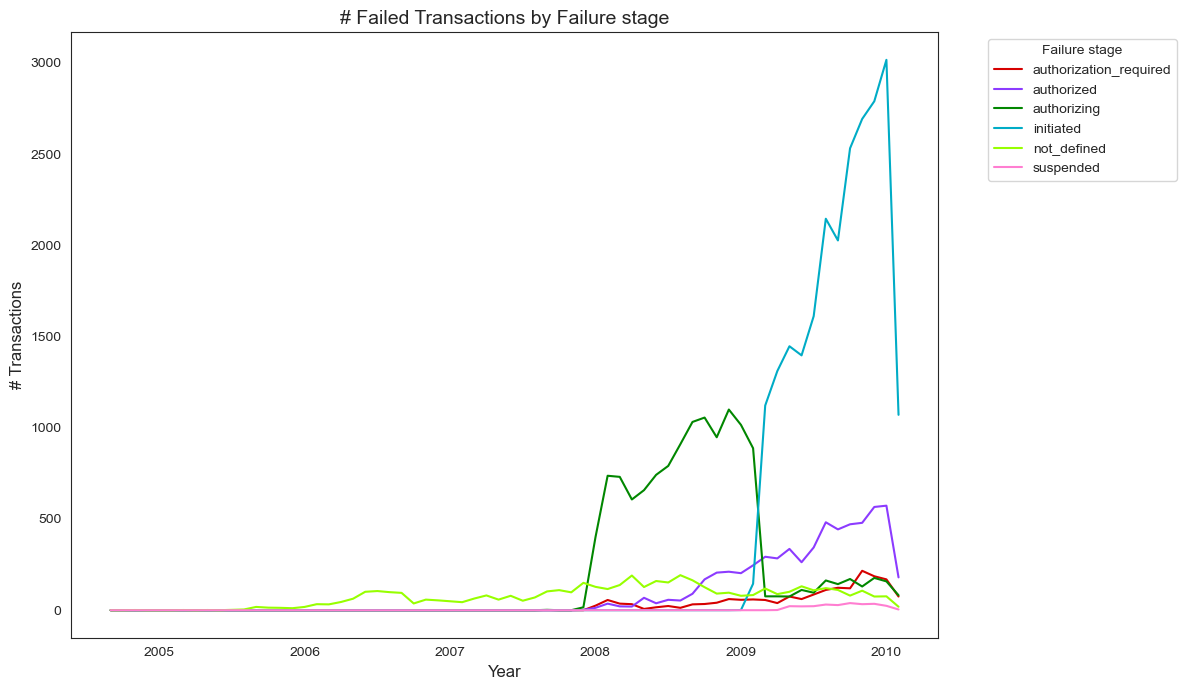

In [67]:
import colorcet as cc

p = sns.color_palette(cc.glasbey, n_colors=30)

cat_vars = ['failure_reason', 'currency', 'connectivity_type', 'country_id', 'api_version', 'vertical', 'failure_stage']

def vis_trend(df, agg_var):
    df_agg = df.groupby(by=['created_at_year_month', agg_var]).agg(
        n_transactions = ('id', 'count')
    ).reset_index()

    # ticks
    df_agg['created_at_year_month_labels'] = df_agg['created_at_year_month'].apply(lambda x: x[:4] if x.endswith('Jan') else '') # for visualization (x axis)
    df_agg['created_at_year_month_ticks'] = df_agg['created_at_year_month'].apply(lambda x: x if x.endswith('Jan') else '') # for visualization (x axis)


    _, ax = plt.subplots(figsize=(12,7))
    sns.lineplot(x='created_at_year_month', y='n_transactions', data=df_agg, hue=agg_var, ax=ax, palette=p)
    ax.legend(title=f'{agg_var.replace("_", " ").capitalize()}', loc='upper left', bbox_to_anchor=(1.05, 1))

    ax.set_xticks(ticks=df_agg['created_at_year_month_ticks'].unique(), labels=df_agg['created_at_year_month_labels'].unique(), fontsize=10)

    ax.set_title(f'# Failed Transactions by {agg_var.replace("_", " ").capitalize()}',fontsize=14)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('# Transactions', fontsize=12)
    # ax.grid()

    plt.tight_layout()
    plt.show()

# stacked version of the vis_trend
# def vis_trend_stacked(df, agg_var):
#     df_agg = df.groupby(by=['created_at_year_month', agg_var]).agg(
#         n_transactions = ('id', 'count')
#     ).reset_index()

#     df_agg_pivot = pd.pivot_table(data=df_agg, values='n_transactions', index='created_at_year_month', columns=agg_var)
#     print(df_agg_pivot.head())

#     # ticks
#     df_agg['created_at_year_month_labels'] = df_agg['created_at_year_month'].apply(lambda x: x[:4] if x.endswith('Jan') else '') # for visualization (x axis)
#     df_agg['created_at_year_month_ticks'] = df_agg['created_at_year_month'].apply(lambda x: x if x.endswith('Jan') else '') # for visualization (x axis)


#     _, ax = plt.subplots(figsize=(12,7))
#     sns.lineplot(x='created_at_year_month', y='n_transactions', data=df_agg, hue=agg_var, ax=ax, palette=p)
#     ax.legend(title=f'{agg_var.replace("_", " ").capitalize()}', loc='upper left', bbox_to_anchor=(1.05, 1))

#     ax.set_xticks(ticks=df_agg['created_at_year_month_ticks'].unique(), labels=df_agg['created_at_year_month_labels'].unique(), fontsize=10)

#     ax.set_title(f'# Failed Transactions by {agg_var.replace("_", " ").capitalize()}',fontsize=14)
#     ax.set_xlabel('Year', fontsize=12)
#     ax.set_ylabel('# Transactions', fontsize=12)

#     for i, c in enumerate(df_agg_pivot.columns):
#         s = df_agg_pivot[c]
#         s_cum = 
#         if i > 0:
#             s_prev = df_agg_pivot.iloc[i,:]
#             plt.fill_between(df_agg_pivot["created_at_year_month"], df["Series1_cumsum"], df["Series2_cumsum"], label="Series2", alpha=0.7)

    # Calculate cumulative values for stacking
    # df["Series1_cumsum"] = df["Series1"]
    # df["Series2_cumsum"] = df["Series1"] + df["Series2"]
    # df["Series3_cumsum"] = df["Series2_cumsum"] + df["Series3"]

    # # Plot using Matplotlib and Seaborn
    # plt.figure(figsize=(12, 6))
    # plt.fill_between(df["Date"], 0, df["Series1_cumsum"], label="Series1", alpha=0.7)
    # plt.fill_between(df["Date"], df["Series1_cumsum"], df["Series2_cumsum"], label="Series2", alpha=0.7)
    # plt.fill_between(df["Date"], df["Series2_cumsum"], df["Series3_cumsum"], label="Series3", alpha=0.7)

    # plt.tight_layout()
    # plt.show()

#vis_trend_stacked(df=df.query('status == "Failed"'), agg_var='currency')

for v in cat_vars:
    vis_trend(df=df.query('is_failed == 1'), agg_var=v)

In [108]:
# failed transactions by country
print(df.query('is_failed == 1')['country_id'].value_counts())

country_id
9e2b06736b477b7a924f60de14a7e329d82d6f4f    40787
37eec10a53dd5fd2f024a17be5961dfceb0c66e6     3287
f69ad584c025f9b756ce1e8c70de3a33aef50b32     2220
7ec009376b8bf0c03561b3f6ba251ab9d96efd42      753
a68db3fc75fd72a12bb2ad1442ff9927bd04139d      720
6cdea52ce51f6e135c958a0e37b24c58f571b638      637
e663a75ca1d25c297c92ca032b7bd8d1af3b0b5c      259
b5ef652e26c43e83e5a96e013823c0984e2377c2      198
1ef393c389ad6e2b2d4d865f843dcf351b1d19f5      196
229fcb7e40c6421b7091c1e9fccf6d94da25d396      116
beb7a78398a040dadb3da1ba0474ba3899285e46       94
2709cc79b96641fdf25b1da4ed76b33b0f0cde57       87
a05b131fd348c62de04bce3d93a6cd396b1db85f        6
11a86f49df0e17ddda56f76629d36557cb870e6f        3
Name: count, dtype: int64


In [109]:
# by connection type
print(df.query('is_failed == 1 and country_id=="9e2b06736b477b7a924f60de14a7e329d82d6f4f"')['connectivity_type'].value_counts())
#vis_trend(df=df.query('status == "Failed" and country_id=="9e2b06736b477b7a924f60de14a7e329d82d6f4f"'), agg_var='bank_id')

connectivity_type
type 8         40767
type 2             8
type 6             6
not_defined        6
Name: count, dtype: int64


In [104]:
# failure_reason
df.query('is_failed == 1')['failure_reason'].value_counts().sort_values(ascending=False)

failure_reason
expired                        23173
not_authorized                  6561
provider_rejected               5586
not_defined                     4742
canceled                        2797
user_canceled_at_provider       2182
provider_error                  1307
insufficient_funds              1098
provider_expired                1047
verification_declined            260
rejected                         222
internal_server_error            190
constraint_violation              70
payment_limit_exceeded            39
authorization_failed              29
invalid_credentials               19
invalid_remitter_account          16
mandate_revoked                   14
invalid_account_details            6
invalid_beneficiary_account        3
invalid_otp                        2
Name: count, dtype: int64

## Failure Rate for Large Transactions

/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_64661/2813486201.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  failure_rates = df_CAD.groupby('amount_bin')['is_failed'].mean()
/opt/anaconda3/envs/ml/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


amount_bin
<q10         0.098137
(q10,q50]    0.096900
(q50,q95]    0.094285
(q95,q99]    0.137545
>q99         0.198303
Name: is_failed, dtype: float64


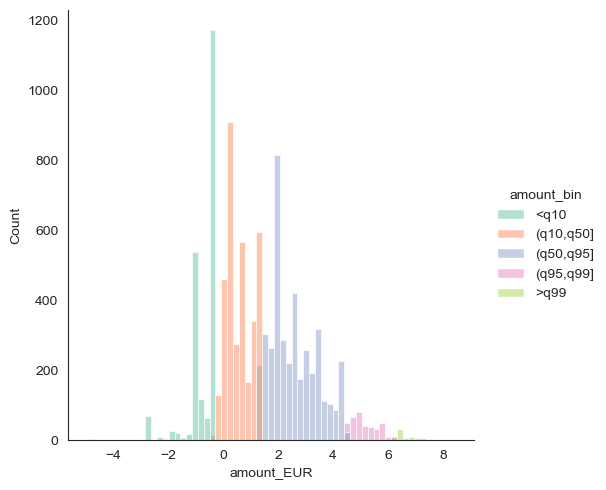

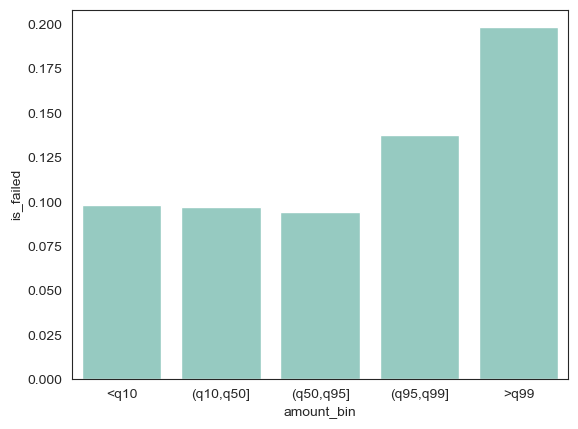

amount_bin
(q50,q95]    18953
(q10,q50]    16442
<q10         10236
(q95,q99]     2774
>q99           958
Name: count, dtype: int64


In [64]:
df_CAD = df#.query('currency=="CAD"')
# df_CAD['amount_bin_1'] = pd.cut(
#         df_CAD["amount_in_currency"], 
#         bins=np.concatenate([[df_CAD["amount_in_currency"].min()], 
#                          np.quantile(df_CAD["amount_in_currency"], [0.1, 0.5, 0.95, 0.99]), 
#                          [df_CAD["amount_in_currency"].max()]]), 
#         labels=['<q10', '(q10,q50]', '(q50,q95]', '(q95,q99]', '>q99'], 
#         right=True,
#         include_lowest=True,
#     )
#df_CAD['amount_bin'] = df_CAD['amount_bin'].astype(dtype=pd.CategoricalDtype(categories=['<q10', '(q10,q50]', '(q50,q95]', '>q99'],ordered=True))

failure_rates = df_CAD.groupby('amount_bin')['is_failed'].mean()
print(failure_rates)


sns.displot(x=np.log(df_CAD['amount_EUR']), data=df_CAD.sample(10000), hue='amount_bin', palette='Set2')
plt.show()
sns.barplot(x=failure_rates.index, y=failure_rates)
plt.show()
print(df_CAD.query('is_failed == 1')['amount_bin'].value_counts())

In [60]:
from scipy.stats import chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd

contingency_table = pd.crosstab(df_CAD['amount_bin'], df_CAD['is_failed'])
print(contingency_table)

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square statistic: {chi2}, p-value: {p}")

# Perform Tukey's HSD Test
tukey = pairwise_tukeyhsd(endog=df_CAD['is_failed'], groups=df_CAD['amount_bin'], alpha=0.05)
print(tukey)

is_failed        0      1
amount_bin               
<q10         92127  10040
(q10,q50]   131990  13332
(q50,q95]   147924  14584
(q95,q99]    13042   1998
>q99          3251    813
Chi-Square statistic: 855.0425984795447, p-value: 9.158645663684277e-184
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
(q10,q50] (q50,q95]   -0.002 0.3232 -0.0049  0.0009  False
(q10,q50] (q95,q99]   0.0411    0.0  0.0343  0.0479   True
(q10,q50]      <q10   0.0065    0.0  0.0033  0.0098   True
(q10,q50]      >q99   0.1083    0.0  0.0956   0.121   True
(q50,q95] (q95,q99]   0.0431    0.0  0.0363  0.0499   True
(q50,q95]      <q10   0.0085    0.0  0.0053  0.0117   True
(q50,q95]      >q99   0.1103    0.0  0.0976   0.123   True
(q95,q99]      <q10  -0.0346    0.0 -0.0416 -0.0276   True
(q95,q99]      >q99   0.0672    0.0  0.0531  0.0813   True
     <q10      >q99   0.1018    0.0  

9131.237755741127 9.119456534579959
2357.8455073586365 7.765503560443097


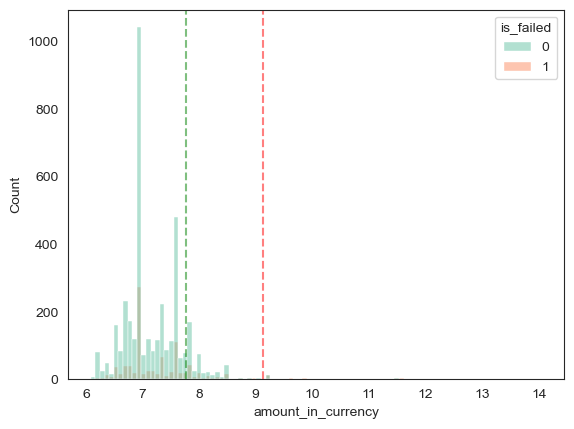

In [110]:
df_CAD_q99 = df_CAD.query('amount_bin == ">q99"')
mean_amount_failed = df_CAD_q99.query('is_failed == 1')['amount_in_currency'].mean()
mean_amount_not_failed = df_CAD_q99.query('is_failed == 0')['amount_in_currency'].mean()
print(mean_amount_failed, np.log(mean_amount_failed))
print(mean_amount_not_failed, np.log(mean_amount_not_failed))
sns.histplot(x=np.log(df_CAD_q99['amount_in_currency']), data=df_CAD_q99, hue = 'is_failed', palette = 'Set2')
plt.axvline(x=np.log(mean_amount_failed), color='red', alpha=0.5, ls='--')
plt.axvline(x=np.log(mean_amount_not_failed), color='green', alpha=0.5, ls='--')
plt.show()
#df_CAD_q99[['customer_id', 'amount_in_currency', 'is_failed', 'status', 'failure_reason', 'createdat_ts']].sort_values(by=['customer_id','createdat_ts'], ascending=False).head(50)

/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_64661/4082578110.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg = df.groupby(by=['created_at_year_month', agg_var]).agg(
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_64661/4082578110.py:18: UserWarning: The palette list has more values (30) than needed (5), which may not be intended.
  sns.lineplot(x='created_at_year_month', y='n_transactions', data=df_agg, hue=agg_var, ax=ax, palette=p)


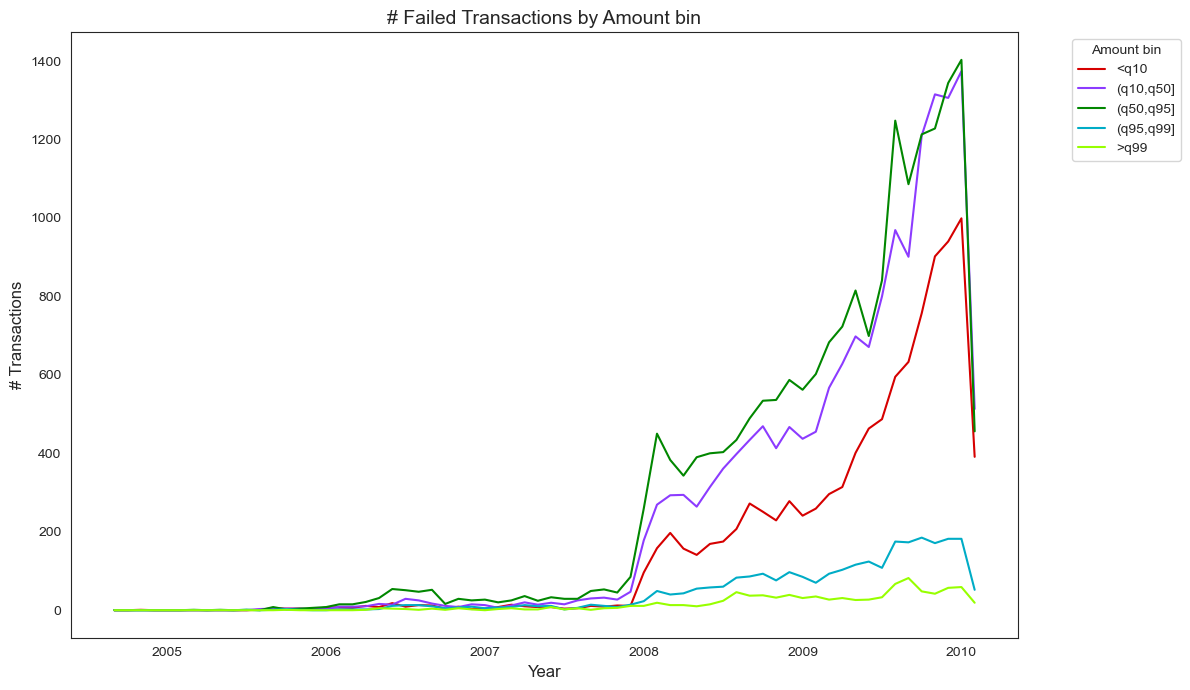

In [69]:
vis_trend(df=df.query('is_failed == 1'), agg_var='amount_bin')

### Calculate Metrics per User

/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_64661/2230073807.py:33: RuntimeWarning: invalid value encountered in scalar divide
  'pct_amount_per_transaction_failed': sum_amount_failed / cnt_transactions_failed,
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_64661/2230073807.py:33: RuntimeWarning: invalid value encountered in scalar divide
  'pct_amount_per_transaction_failed': sum_amount_failed / cnt_transactions_failed,
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_64661/2230073807.py:33: RuntimeWarning: invalid value encountered in scalar divide
  'pct_amount_per_transaction_failed': sum_amount_failed / cnt_transactions_failed,
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_64661/2230073807.py:33: RuntimeWarning: invalid value encountered in scalar divide
  'pct_amount_per_transaction_failed': sum_amount_failed / cnt_transactions_failed,
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_64661/2230073807.py:33: RuntimeWarnin

,cnt_transactions,cnt_transactions_failed,sum_amount,sum_amount_failed,pct_cnt_failed,pct_amount_per_transaction,pct_amount_per_transaction_failed,cnt_dist_country,cnt_dist_bank
customer_id,,,,,,,,,
2cbda12f6a051be544bf575928869a1eac9dbf4b,2.0,2.0,28.584906,28.584906,1.000000,14.292453,14.292453,1.0,2.0
8ff294d18c4352d9167b8d08a8175521c221e030,3.0,3.0,315.565517,315.565517,1.000000,105.188506,105.188506,1.0,2.0
f745babe4385d11c8b0f73f10a210d8b9ebdb201,1.0,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,1.0
c1b82ed9c14801c28867d64e8145e713b6717b3b,1.0,1.0,0.006897,0.006897,1.000000,0.006897,0.006897,1.0,1.0
7d0ecaeb2e1389fb83c363a1311a8f629d2f58ac,1.0,1.0,0.206897,0.206897,1.000000,0.206897,0.206897,1.0,1.0
d96607c7a2d5862ef3409c2857c76923523eeb55,1.0,1.0,47.169811,47.169811,1.000000,47.169811,47.169811,1.0,1.0
942adf4a1b88991ce83beed7a780b0e68adf8b4e,1.0,1.0,92.689655,92.689655,1.000000,92.689655,92.689655,1.0,1.0
5f9937e0af5736404de3f91bd4d8d63a0fdef66a,36.0,26.0,9048.264151,6668.188679,0.722222,251.340671,256.468795,3.0,15.0
e4cf6aafffbe641b102e6f63723be52df29f3e43,72.0,51.0,5515.806897,4571.710345,0.708333,76.608429,89.641379,1.0,14.0


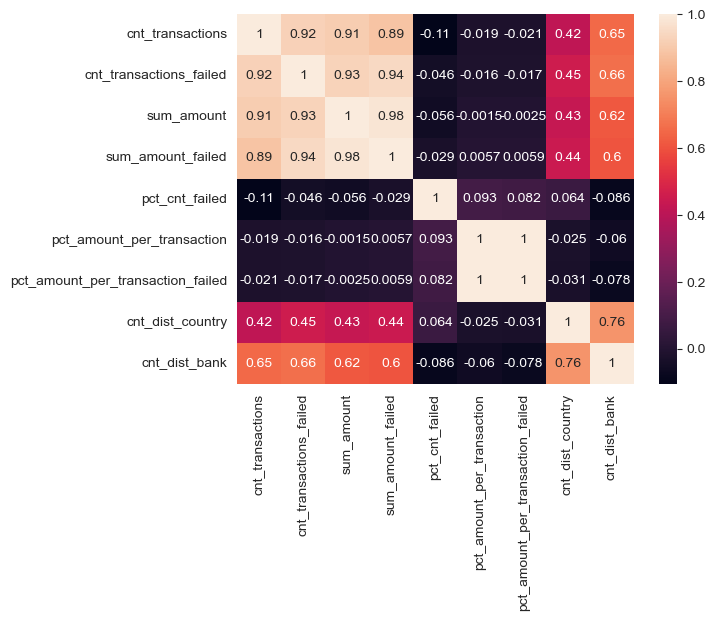

In [76]:
def calculate_metrics_per_user(group):
    """
    Function is applyed to groupped dataframe to calculate per group (user) summaries.

    Parameters
    ----------
    group : _type_
        Result of applying .groupby to a dataframe.

    Returns
    -------
    pd.Series
        Containing summaries per group (user)
    """
    # count steps before registration date
    cnt_transactions = group['id'].count()
    # count steps after registration date
    cnt_transactions_failed = group.query('is_failed >= 1')['id'].count()
    # count days (records) before registration date
    sum_amount = group['amount_EUR'].sum()
    # count days (records) after registration date
    sum_amount_failed = group.query('is_failed >= 1')['amount_EUR'].sum()
    # count distinct countries
    cnt_dist_country = group['country_id'].nunique()
    cnt_dist_bank = group['bank_id'].nunique()
   
    return pd.Series({'cnt_transactions': cnt_transactions, 
                      'cnt_transactions_failed': cnt_transactions_failed, 
                      'sum_amount': sum_amount,
                      'sum_amount_failed': sum_amount_failed,
                      'pct_cnt_failed': cnt_transactions_failed / cnt_transactions,
                      'pct_amount_per_transaction': sum_amount / cnt_transactions,
                      'pct_amount_per_transaction_failed': sum_amount_failed / cnt_transactions_failed,
                      'cnt_dist_country': cnt_dist_country,
                      'cnt_dist_bank': cnt_dist_bank
                      })

df_agg = df.groupby('customer_id').apply(calculate_metrics_per_user)#.reset_index()
corr_matrix = df_agg.corr()
sns.heatmap(corr_matrix, annot=True)
df_agg.sort_values('pct_cnt_failed', ascending=False).head(30)
